# Step 0. Read in Data and NLTK Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = pd.read_csv('Amazon_reveiw.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(2001, 11)
(500, 11)


In [ ]:
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1.300000e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1.350000e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1.220000e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1.310000e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1.350000e+09,Great taffy,Great taffy at a great price. There was a wide...


## Quick EDA

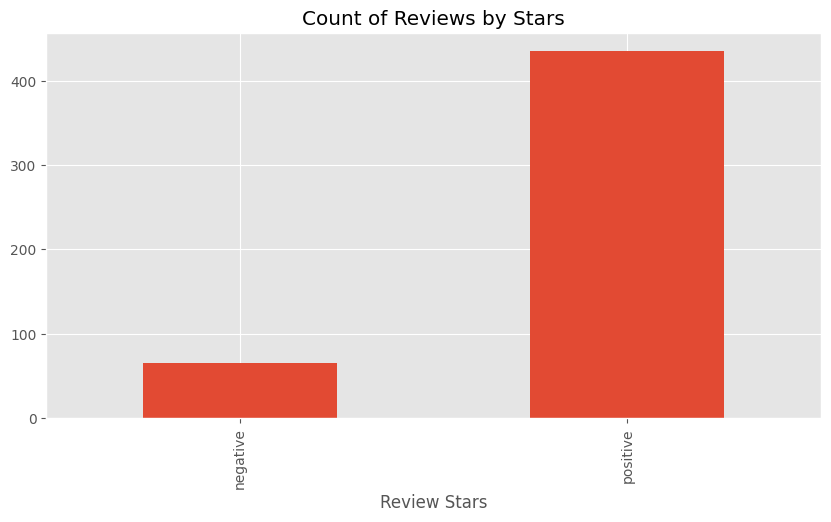

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [ ]:
example = df['Text'][50]
print(example)

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.


In [ ]:
import nltk

# Download the required resource for pos_tag
# This explicitly downloads the English averaged perceptron tagger
nltk.download('averaged_perceptron_tagger_eng')

tokens = nltk.word_tokenize(example)
# You can optionally verify the tokens and tagged lists here
# print(tokens[:10])
tagged = nltk.pos_tag(tokens)
# print(tagged[:10])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
# Download the necessary resource for named entity chunking
nltk.download('maxent_ne_chunker_tab')
# Download the 'words' corpus required by ne_chunk
nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  I/PRP
  roast/VBP
  at/IN
  home/NN
  with/IN
  a/DT
  stove-top/JJ
  popcorn/JJ
  popper/NN
  (/(
  but/CC
  I/PRP
  do/VBP
  it/PRP
  outside/IN
  ,/,
  of/IN
  course/NN
  )/)
  ./.
  These/DT
  beans/NNS
  (/(
  (ORGANIZATION
    Coffee/NNP
    Bean/NNP
    Direct/NNP
    Green/NNP
    Mexican/NNP
    Altura/NNP)
  )/)
  seem/VBP
  to/TO
  be/VB
  well-suited/JJ
  for/IN
  this/DT
  method/NN
  ./.
  The/DT
  first/JJ
  and/CC
  second/JJ
  cracks/NNS
  are/VBP
  distinct/JJ
  ,/,
  and/CC
  I/PRP
  've/VBP
  roasted/VBN
  the/DT
  beans/NNS
  from/IN
  medium/NN
  to/TO
  slightly/RB
  dark/JJ
  with/IN
  great/JJ
  results/NNS
  every/DT
  time/NN
  ./.
  The/DT
  aroma/NN
  is/VBZ
  strong/JJ
  and/CC
  persistent/JJ
  ./.
  The/DT
  taste/NN
  is/VBZ
  smooth/JJ
  ,/,
  velvety/NN
  ,/,
  yet/RB
  lively/RB
  ./.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk # Make sure nltk is imported

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.8761}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1.300000e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1.350000e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1.220000e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1.310000e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1.350000e+09,Great taffy,Great taffy at a great price. There was a wide...


## Plot VADER results

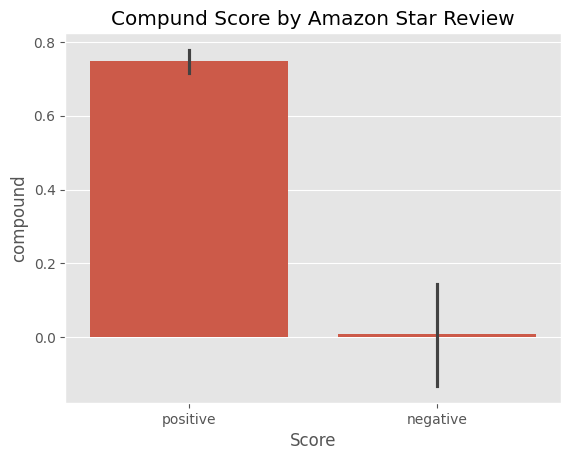

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

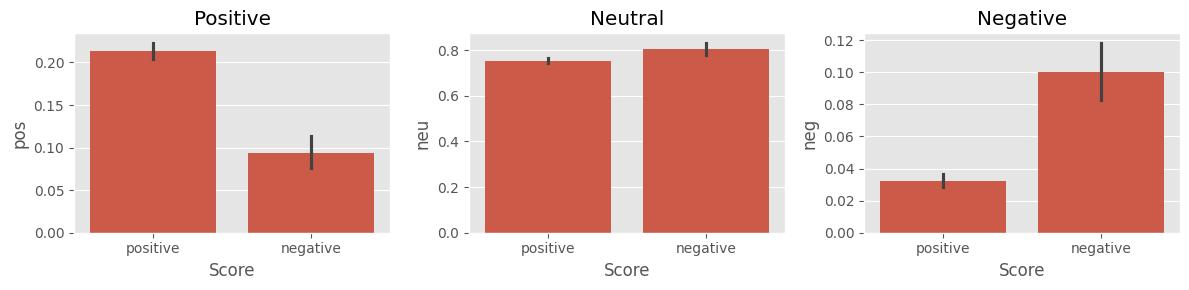

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()